In [4]:
from datetime import datetime  # calculating time until expiration
import numpy as np  # performing numerical methods
import pandas as pd  # printing dataframes
import yfinance as yf # retrieving financial data
import csv # csv library

"""
Pricing of stock futures and construction of a portfolio containing both underlying equity
and futures as a hedge.

Attributes
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ticker: str
    ticker of underlying stock

s: float
    spot price of underlying stock, in united states dollars $

t0: str
    current date

tf: str
    expiration date

q: float
    dividend yield, in percentage %, default = 0.00%

tol: float
    risk tolerance, in percentage %, default = 0.00%

liq: float
    user liquidity, in united states dollars $, default = $10,000

shares: float
    user position in underlying stock, in united states dollars $, default = 100 * s

"""

'\nPricing of stock futures and construction of a portfolio containing both underlying equity\nand futures as a hedge.\n\nAttributes\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\nticker: str\n    ticker of underlying stock\n\ns: float\n    spot price of underlying stock, in united states dollars $\n\nt0: str\n    current date\n\ntf: str\n    expiration date\n\nq: float\n    dividend yield, in percentage %, default = 0.00%\n\ntol: float\n    risk tolerance, in percentage %, default = 0.00%\n\nliq: float\n    user liquidity, in united states dollars $, default = $10,000\n\nshares: float\n    user position in underlying stock, in united states dollars $, default = 100 * s\n\n'

Current date 2022-11-11; difference between dates 0.0; upper case ticker TSLA; market 195.74; dividend rate 0: 
Got error from yahoo api for ticker TSLA=F, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TSLA=F: No data found for this date range, symbol may be delisted


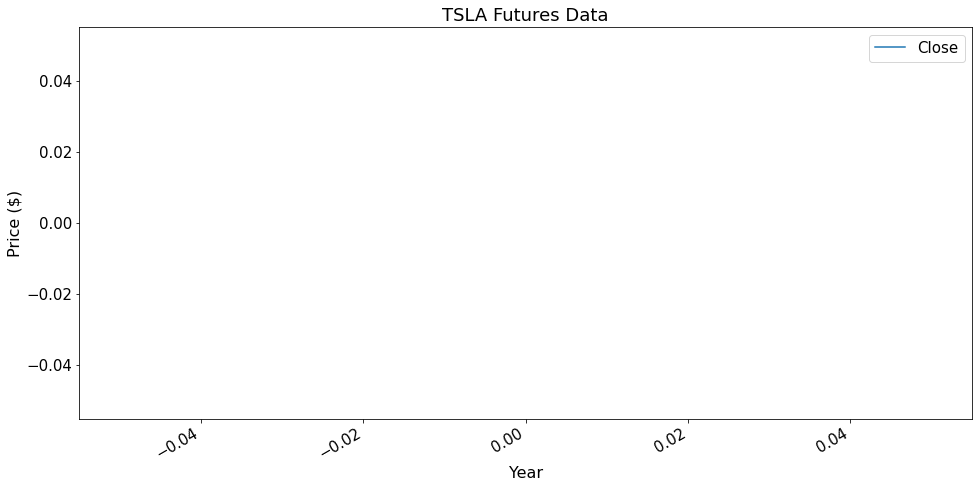

In [3]:
# parent/super class
class Hedge:
    def __init__(self, s: float, t0: str, tf: str, tol: float = 0.00, liq: float = 10000, shares: float = 100, ticker ="GSPC"):
        assert (1 <= len(ticker) <= 5);  # ticker symbol must have between one and five characters
        assert s >= 0  # stock price cannot be less than $0.00
        assert q >= 0 # dividend yield cannot be less than 0.00%
        assert tol >= 0  # risk tolerance cannot be less than 0.00%
        assert liq >= 10000  # user must have at least $10,000 in liquidity
        assert shares >= 0.00  # user must have at least 100 shares in underlying equity
        # ticker symbol
        self.ticker = yf.Ticker(ticker.upper()).info
        # spot price
        self.s = float(self.ticker['regularMarketPrice'])
        # risk free rate
        self.rf = self.risk_free_rate()
        # dividend yield
        self.q = float(self.ticker['dividendRate'])
        # intial date
        self.t0 = datetime.strptime(t0, "%Y-%m-%d")
        #final date
        self.tf = datetime.strptime(tf, "%Y-%m-%d")
        # porportion of time from intial to final
        self.t = float(((self.tf  -self.t0) / 365))
        # risk tolerance
        self.tol = float(tol)
        # Capital/liquid money
        self.liq = float(liq)
        # total value of number of shares
        self.shares = float(shares * self.s);

    def risk_free_rate(self): # calculate risk-free rate of return
        rates = pd.read_csv('rates.csv')

        if 0 < self.t <= 1 / 12:
            nominal = rates["1 Mo"].mean()
        elif 1 / 12 < self.t <= 1 / 6:
            nominal = rates["2 Mo"].mean()
        elif 1 / 6 < self.t <= 1 / 4:
            nominal = rates["3 Mo"].mean()
        elif 1 / 4 < self.t <= 1 / 3:
            nominal = rates["4 Mo"].mean()
        elif 1 / 3 < self.t <= 1 / 2:
            nominal = rates["6 Mo"].mean()
        elif 1 /  2 < self.t <= 1:
            nominal = rates["1 yr"].mean()
        elif 1 < self.t <= 2:
            nominal = rates["2 Yr"].mean()
        elif 2 < self.t <= 3:
            nominal = rates["3 Yr"].mean()
        elif 3 < self.t <= 5:
            nominal = rates["5 Yr"].mean()
        elif 5 < self.t <= 7:
            nominal = rates["7 Yr"].mean()
        elif 7 < self.t <= 10:
            nominal = rates["10 Yr"].mean()
        elif 10 < self.t <= 20:
            nominal = rates["20 Yr"].mean()
        elif 20 < self.t <= 30:
            nominal = rates["30 Yr"].mean()

        return (1 + nominal) / (1 + 0.077)

    def benchmark_rate(self): # calculate performance of a benchmark
        his_table = yf.download("GSPC", self.t0-(self.t*365))['Adj Close']
        hist_s = his_table.loc[self.t0-(self.t*365)][self.ticker]
        benchmark_rate = abs(hist_s-self.s)/hist_s
        return benchmark_rate

        # set the S&P as the default benchmark
        """"
            add implementation
        """
        pass;

    def pricing(self): # pricing of a singular futures contract on underlying equity
        if self.q == None:
            self.q = 0
        return float(100 * self.s * np.e**((self.rf - self.q)*self.t));

    def beta(self): # covariance function sotck value and futures contract
        stock_table = yf.download(self.ticker, self.t0)
        # return np.cov(abc, xyz)

    def expected_return(self): # calculate the expected return (w/ respect to a benchmark)
        return float(self.risk_free_rate() + self.beta()*(Hedge.benchmark_rate() - self.risk_free_rate()));

    def n(self): # calculate the ideal number of futures contracts on the underlying equity
        return float(Hedge.beta() * self.shares / self.pricing());

    def portfolio(self,): # construct an ideal portfolio, containing the user's existing
                                # position in the underlying equity and n futures contracts

        pass

    def basis_risk(self): # calculate basis risk of portfolio
        return float(Hedge.n() * (self.s - self.pricing()));

    def metrics(self): # calculate performance & risk metric of portfolio

        pass

    def _str_(self):

        pass


tesla = EDWARD_dashboard("tSlA","future",300,"2022-11-11")
print(tesla)
# print(tesla.futures_formula())
# tesla.options_data('calls')
# tesla.options_data('puts')
a = tesla.futures_data()
tesla.futures_plot(a)

In [18]:
# User Inputs
input_symbol = input("Ticker Symbol you would like to use? ")
# ticker_symbol = yf.Ticker(input_symbol)
capital = input("How much Capital would you like to invest ")
risk_tol = input("How much Capital would you like to invest ")
input_exercise_price = int(input("What price would you like to exercise the shares at? "))
input_expiration_date = input("What date would you like to set the expiration? (Y-M-D)")
# EDWARD_dashboard(input_symbol, input_exercise_price, input_expiration_date, capital, risk_tol)


ValueError: invalid literal for int() with base 10: ''

In [14]:
# with open("rates.csv", 'r') as file:
#     rates = csv.reader(file)
#     for row in rates:
#         print(row)
#         break

['Date', '1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']


In [1]:
rates = pd.read_csv('rates.csv')

if 0 < self.t <= 1 / 12:
    nominal = rates["1 Mo"].mean()
elif 1 / 12 < self.t <= 1 / 6:
    nominal = rates["2 Mo"].mean()
elif 1 / 6 < self.t <= 1 / 4:
    nominal = rates["3 Mo"].mean()
elif 1 / 4 < self.t <= 1 / 3:
    nominal = rates["4 Mo"].mean()
elif 1 / 3 < self.t <= 1 / 2:
    nominal = rates["6 Mo"].mean()
elif 1 /  2 < self.t <= 1:
    nominal = rates["1 yr"].mean()
elif 1 < self.t <= 2:
    nominal = rates["2 Yr"].mean()
elif 2 < self.t <= 3:
    nominal = rates["3 Yr"].mean()
elif 3 < self.t <= 5:
    nominal = rates["5 Yr"].mean()
elif 5 < self.t <= 7:
    nominal = rates["7 Yr"].mean()
elif 7 < self.t <= 10:
    nominal = rates["10 Yr"].mean()
elif 10 < self.t <= 20:
    nominal = rates["20 Yr"].mean()
elif 20 < self.t <= 30:
    nominal = rates["30 Yr"].mean()

print((1 + nominal) / (1 + 0.077))